#  TP 6.8 Classification d'images Couleur
L'objectif des TPS 7.7 et 6.8 est de travailler sur des données de type images.</br>
Il existe un grands nombre de datasets pour la classification d'images :
image noir et blanc(différents niveaux de gris) ou couleur.
Les images sont représentées sous formes de matrices :
- une image noire et blanc est représentée sous forme d'une matrice (X,Y), 
- une image couleur est un tensor (X,Y,3), 3 correspond à(RGB)
- les valeurs dans les matrices sont comprises entre 0 et 255.</br>

Pour le modèle de neurones, nous prenons un DNN, réseau à couches, MAIS, ces modèles ne sont pas les plus appropriés pour traiter les images.
Les meilleurs modèles sont, les CNN (Convolutional Neural Network) (les modèles à convolution). 


In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import keras_tuner as kt  ## le keras tuner 

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import pandas as pd
import numpy as np


## Lecture des données
Keras (tensoflow) propose des datasets, il suffit donc de lire le dataset 

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 47s 0us/step


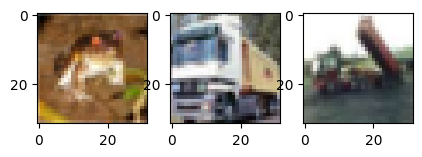

In [3]:
def show_images(images,n):
    plt.figure(figsize=(10, 10))
    for i in range(n):
        plt.subplot(6, 6, i + 1)
        plt.imshow(images[i])
        
    plt.show()
    
show_images(X_train,3)

### Afficher ?
- les tailles des X train et Y_train
- le type de label, la lists les différents labels à prédire 
- La taille de chaque image

In [5]:
X_train.shape[0], X_test.shape[0], np.unique(y_train)


(50000, 10000, array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

### Une façon simple de normaliser :
divider juste par le Max des valeurs (ici 255)

In [6]:
## On peut utiliser une simple normalisation (x-mu)/ecart type)
print('Before normalization : Min={}, max={}'.format(X_train.min(),X_train.max()))

xmax=X_train.max()
X_train = X_train / xmax
X_test  = X_test  / xmax

print('After normalization  : Min={}, max={}'.format(X_train.min(),X_train.max()))

Before normalization : Min=0, max=255
After normalization  : Min=0.0, max=1.0


In [7]:
X_train[0].shape

(32, 32, 3)

#### Définition du modèle ?
Définir un modèle simple ?: 
- Quelle est la dimension de la couche d'entrée ?
    - Attention chaque exemple fourni au DNN est un vecteur, or dans ce dataset, chaque image (exemple) est une matrice
    - --> Solution (regarder la fonction Flatten de Keras (ou autre d'ailleurs)
- Deux couches cachées à 64 neurones
- une couche de  sortie ?
    - Combien de neurones doit elle avoir ?
    - Quel type d'activation à utiliser ?
- Quelle loss ?


In [8]:
hidden1     = 64
hidden2     = 64
new_y_train = keras.utils.to_categorical(y_train, 10)
new_y_test  = keras.utils.to_categorical(y_test, 10)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(hidden1, activation='relu'),
    keras.layers.Dense(hidden2, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Entrainer le modèle ?

In [9]:
batch_size  = 512
epochs      =  16

history = model.fit(  
    X_train, new_y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test, new_y_test),
    verbose=1
)

Epoch 1/16


98/98 [==============================] - 3s 16ms/step - loss: 2.0353 - accuracy: 0.2602 - val_loss: 1.8994 - val_accuracy: 0.3194
Epoch 2/16
98/98 [==============================] - 1s 6ms/step - loss: 1.8398 - accuracy: 0.3474 - val_loss: 1.7992 - val_accuracy: 0.3611
Epoch 3/16
98/98 [==============================] - 1s 7ms/step - loss: 1.7669 - accuracy: 0.3736 - val_loss: 1.7326 - val_accuracy: 0.3901
Epoch 4/16
98/98 [==============================] - 1s 7ms/step - loss: 1.7186 - accuracy: 0.3900 - val_loss: 1.7089 - val_accuracy: 0.3940
Epoch 5/16
98/98 [==============================] - 1s 6ms/step - loss: 1.6791 - accuracy: 0.4033 - val_loss: 1.6877 - val_accuracy: 0.4055
Epoch 6/16
98/98 [==============================] - 1s 6ms/step - loss: 1.6469 - accuracy: 0.4175 - val_loss: 1.6546 - val_accuracy: 0.4124
Epoch 7/16
98/98 [==============================] - 1s 6ms/step - loss: 1.6248 - accuracy: 0.4235 - val_loss: 1.6208 - val_accuracy: 0.4281
Epoch 8/16
98/98 

### Evaluer le modèle

In [11]:
score = model.evaluate(X_test, new_y_test, verbose=0)

print('Test loss     :', score[0])
print('Test accuracy :', score[1])

Test loss     : 1.556925654411316
Test accuracy : 0.44339999556541443


In [17]:
from tensorflow.keras.applications import VGG16
